In [70]:
import pandas as pd

In [72]:
import numpy as np

In [74]:
from sklearn.svm import SVC

In [162]:
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
from sklearn.model_selection import train_test_split

In [166]:
import matplotlib.pyplot as plt

In [168]:
import seaborn as sns;sns.set(font_scale=1.2)

In [170]:
from sklearn.model_selection import GridSearchCV

In [172]:
recipes=pd.read_csv('c:/recipes_muffins_cupcakes.csv')

In [174]:
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


In [176]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           20 non-null     object
 1   Flour          20 non-null     int64 
 2   Milk           20 non-null     int64 
 3   Sugar          20 non-null     int64 
 4   Butter         20 non-null     int64 
 5   Egg            20 non-null     int64 
 6   Baking Powder  20 non-null     int64 
 7   Vanilla        20 non-null     int64 
 8   Salt           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB


In [156]:
plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Type', ylabel='count'>

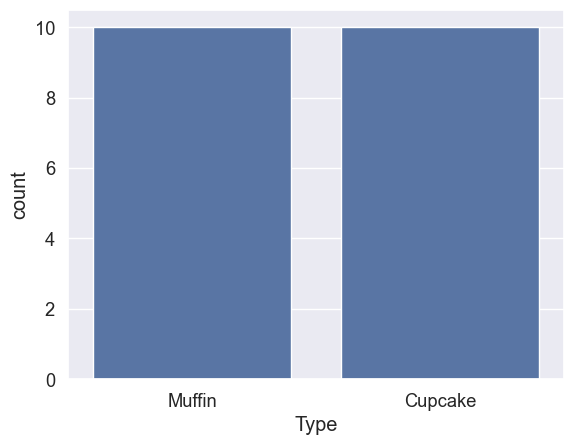

In [158]:
sns.countplot(x=recipes['Type'])

In [160]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

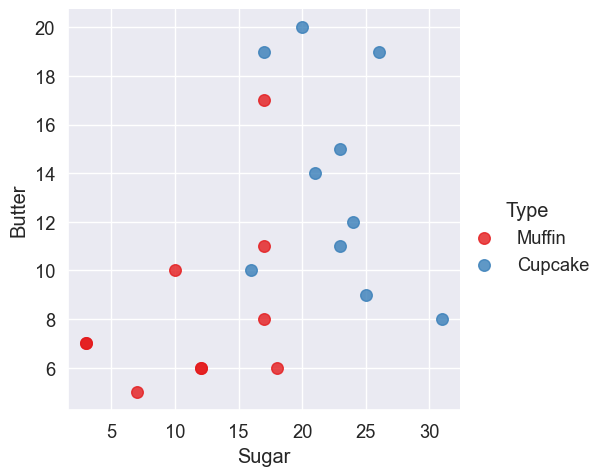

In [188]:
sns.lmplot(x='Sugar',y='Butter',data=recipes,hue='Type',palette='Set1',fit_reg=False,scatter_kws={"s":70})

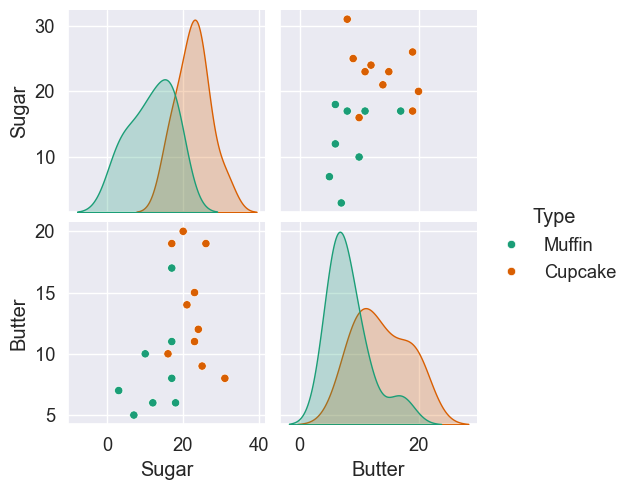

In [189]:
sns.pairplot(recipes,vars=['Sugar','Butter'],hue='Type',palette='Dark2')

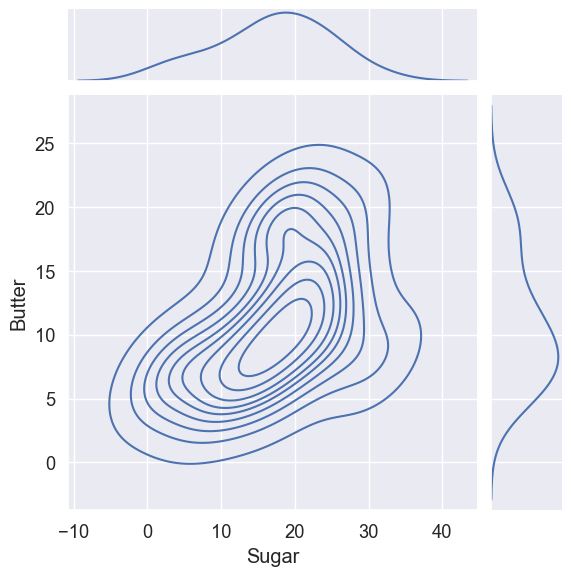

In [191]:
sns.jointplot(x='Sugar',y='Butter',data=recipes,kind='kde')

In [218]:
plt.show()

In [244]:
X=recipes.drop('Type',axis=1)

In [246]:
y=recipes['Type']

In [248]:
kernels=['Polynomial','RBF','Sigmoid','Linear']

In [250]:
def getClassifier(ktype):
    if ktype ==0:
        return SVC(kernel='poly',degree=8,gamma="auto")
    elif ktype==1:
        return SVC(kernel='rbf',gamma="auto")
    elif ktype==2:
        return SVC(kernel='sigmoid',gamma="auto")
    elif ktype==3:
        return SVC(kernel='linear',gamma="auto")

In [256]:
for i in range(4):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
    svclassifier=getClassifier(i)
    svclassifier.fit(X_train,y_train)
    y_pred=svclassifier.predict(x_test)
    print("Evaluation",kernels[i],"kernel")
    print(classification_report(y_test,y_pred))

Evaluation Polynomial kernel
              precision    recall  f1-score   support

     Cupcake       0.50      0.50      0.50         2
      Muffin       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

Evaluation RBF kernel
              precision    recall  f1-score   support

     Cupcake       0.50      0.50      0.50         2
      Muffin       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4

Evaluation Sigmoid kernel
              precision    recall  f1-score   support

     Cupcake       0.00      0.00      0.00         2
      Muffin       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33        

C:\Users\88697\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\88697\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\88697\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [258]:
svm_classifier=SVC(gamma='auto')

In [260]:
svm_classifier.fit(X_train,y_train)

SVC(gamma='auto')

In [262]:
svm_classifier.score(X_train,y_train)

1.0

In [278]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}

In [280]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [282]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [283]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='poly')


In [295]:
grid_predictions=grid.predict(X_test)

In [297]:
print(confusion_matrix(y_test,grid_predictions))

[[2 0]
 [0 2]]


In [299]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

     Cupcake       1.00      1.00      1.00         2
      Muffin       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

